# PCA Basics Without Using ML Library

PCA stands for principal component analysis which is a popular dimentionality reduction technique. Dimention of the data means how many features does the data have. Not all the features that are available to us are relavant to the problem that we are trying to solve so this technique gives important features according to greatest variance in data. PCA gives us principle components along which the variance of the data is maximum. those principle components are the linear combinations of the existing features that our data have. In this article we will discuss how this technique works and the math behind it,

Dimentionality reduction mainly has two parts, Feature selection and feature extraction. Feature selection mostly done manualy with our intuition and the knowledge of the data that we have beforehand. Feature Extraction is combining the existing features to form new features.

Now lets discuss the basic concepts that we will use in PCA

### Lets Start with the statistical concepts,
<b>Mean</b> : Mean is just the average of all he datapoints.<br/>
<b>Variance</b> : Variance is measure of how spread out your data is around the mean. Which is the average distance of all the datapoints from the mean. For example, if you consider the prices of the devices that apple make then the variance should be low, but if you consider the prices of the devices that samsung makes then the variance is very high.
<br/><b>Covariance</b> : is the measure of change of two variables with respect to each another. e.g. lets consider two variables,
x and y if by increasing the value of x, y's value also gets increased then the co-variance in them is positive and vice versa.
<br/><b>Standardization</b> : The process of transforming data into a dataset whos mean is 0 and variance is 1.


### Now lets discuss Concepts of Linear Algebra
<b>Linear Transformation</b> : lets understand what is the meaning of transformation first, well think of it as a function which takes an input and gives an output. So transformation takes a vector as an input and gives a vector as a output. If you apply some transformation onto the vector space then every vector in the space gets tranformed. After applying the transformation if all the lines are lines and origin hasn't changed its place then that transformation is known as Linear Transformation. If all the vectors gets changed then what about the axis vectors ? Yes! they may change according to transformation. Instead of tracking every vector and its transformation if we track only transformation of the axis vectors then we can get transformation of any vector. Which means to transform any vector into new space we just need the new axis vectors. So what if we want to tranform a vector if we know the axis vector after tranformation ? the answer is using matrix multiplication, if we form a matrix of the axis vectors and multiply it with the vector which we have to tranform then we get the new vector which is the transformed vector into new transformed vector space. After transformation the vector may change its direction and length also. Some vectors length becomes zero.<br/>
<b>Eigen Vectors & Eigen Values</b> : After applying transformation if the vector does not change its direction then those vectors are known as Eigen Vectors, and the ratio of the length of the vector before transformation and after transformation is known as eigen value. If eigen value is 2 then the length of the vector increased 2 times than original length.

So in this context Eigen vectors and eigen values will show us the direction of spread of data and the magnitude of the spread respectively. But eigen vectors and eigen values of what ? we cannot just blindly make the matrix of input data and try to findout its eigen values and eigen vectors we will need a matrix which represents relationship i.e. variance and covariance between all the features. Well if we make a matrix of d*d (d=number of dimentions/features) which will represent the covariance and variance between all the features then we can take eigen vectors and eigen values of that matrix. Well that matrix is known as variance-covariance matrix and it represents relationship between all the features/dimentions.

PCA can be performed using following steps,
1. Standerdize the data
2. Find the variance-covariance matrix.
3. Find the eigen values and eigen vectors of the matrix.
4. Sort according to eigen values as those tells us the magnitude of the spreading of data around that eigen vector.
5. Select first n eigen vectors as the axis vectors of your new vector space those are your principal components.
6. Transform your data into new vector space.
7. Finally after transforming apply the necessary algorithm for getting insight of data.
8. Remember that principal components are the linear combination of your existing features (example of feature extraction)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Collecting the data
#For better understanding of the pca i have introduced a less relevant variable in dataset which is built material of the device
#0 is metal, 1 is glass, 2 is plastic
data_laptop_mobile = pd.read_csv("Laptop_mobile_data.csv")
data_laptop_mobile_x = [row["RAM"] for i, row in data_laptop_mobile.iterrows()]
data_laptop_mobile_y = [row["screen_size"] for i, row in data_laptop_mobile.iterrows()]
data_laptop_mobile_z = [row["built"] for i, row in data_laptop_mobile.iterrows()]
plt.scatter(data_laptop_mobile_x,data_laptop_mobile_y)

In [2]:
data_array = np.array(list(zip(data_laptop_mobile_x,data_laptop_mobile_y,data_laptop_mobile_z)))

In [3]:
standerdized_data_array = data_array - np.mean(data_array,axis=0)
var_cov_matrix = np.cov(standerdized_data_array.T)
eig_vals,eig_vectors = np.linalg.eig(var_cov_matrix)

In [4]:
#Printing the eigen values
eig_vals

array([21.55304905,  6.76459773,  0.47408   ])

We can observe eighen value of 1st vector is greater than those of two others which means there is maximum variation along with 1st eigen vector so we will select that vector as our principal component

In [5]:
#Luckily no need of the sorting
eig_vectors[0]

array([0.29681664, 0.94330298, 0.14859127])

We can see that principal component 1 is linear combination of the features i.e. 0.29 times ram_size + 0.94 times screen_size + 0.14 times built.

Now if we want to see the variance of the data along with first principal component then,

In [6]:
var_along_pc1 = (eig_vals[0]/sum(eig_vals)) * 100
var_along_pc1

74.85848005462489

almost 74% of the variation of the data is along pc1 so we will select pc1 as our axis vector and transform our data into new reduced dimention vector space as,

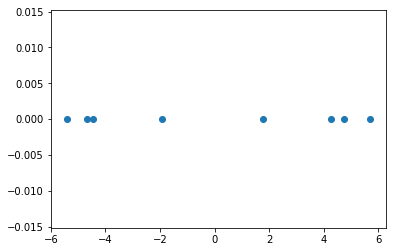

In [7]:
only_one = np.array([eig_vectors[i][0] for i in range(len(eig_vectors))])
trans_data = data_array.dot(only_one.T)
trans_data = trans_data - np.mean(trans_data)
plt.scatter(trans_data,[0 for i in range(8)])

This is the final reduced dimentions plot of our data. For comparison if we use scikit learn for the same thing and plot the data then,

In [8]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=1)
Y_sklearn = sklearn_pca.fit_transform(data_array)

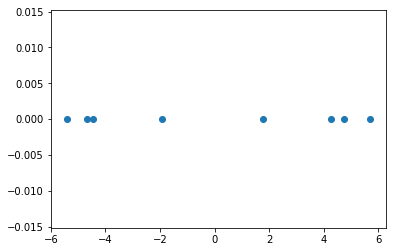

In [9]:
plt.scatter(Y_sklearn,[0 for i in range(8)])

In [10]:
trans_data

array([-5.42446069, -4.66365727, -4.45042569, -1.93079441,  4.24977467,
        5.70821741,  1.78606915,  4.72527681])

In [11]:
Y_sklearn

array([[-5.42446069],
       [-4.66365727],
       [-4.45042569],
       [-1.93079441],
       [ 4.24977467],
       [ 5.70821741],
       [ 1.78606915],
       [ 4.72527681]])

In [12]:
eig_vals

array([21.55304905,  6.76459773,  0.47408   ])

In [13]:
sklearn_pca.explained_variance_

array([21.55304905])

In [16]:
sklearn_pca.explained_variance_ratio_ * 100

array([74.85848005])

In [15]:
var_along_pc1

74.85848005462489

You can see that all the values that we calculated are same as scikitlearn values. Now after transforming data we can apply any algorithm for taking insight from the data.